In [1]:
#http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/0.0-coco-dataset-api.ipynb

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
ROOT_DIR = os.getcwd()
COCO_DATA_PATH = os.path.join(ROOT_DIR, "coco")

In [4]:
dataDir = COCO_DATA_PATH
dataType = 'train2014'
annFilename = 'instances_%s.json'%(dataType)
annFile = os.path.join(dataDir, "annotations", annFilename)

In [5]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=15.32s)
creating index...
index created!


In [6]:
#Load cats with the specified ids.
cats = coco.loadCats(coco.getCatIds()) 
nms=[cat['name'] for cat in cats]
print('COCO categories count: ', len(cats))
print('COCO categories: \n\n', ' '.join(nms))

print("\n")

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories count: ', len(nms))
print('COCO supercategories: \n',' '.join(nms))

COCO categories count:  80
COCO categories: 

 person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush


COCO supercategories count:  12
COCO supercategories: 
 indoor accessory person appliance outdoor sports furniture kitchen vehicle animal electronic food


In [7]:
catIds = coco.getCatIds(catNms=['person','dog','airplane']); 
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

img

{'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000477636.jpg',
 'date_captured': '2013-11-16 03:17:03',
 'file_name': 'COCO_train2014_000000477636.jpg',
 'flickr_url': 'http://farm3.staticflickr.com/2764/5863914714_3ef8f310b6_z.jpg',
 'height': 503,
 'id': 477636,
 'license': 3,
 'width': 640}

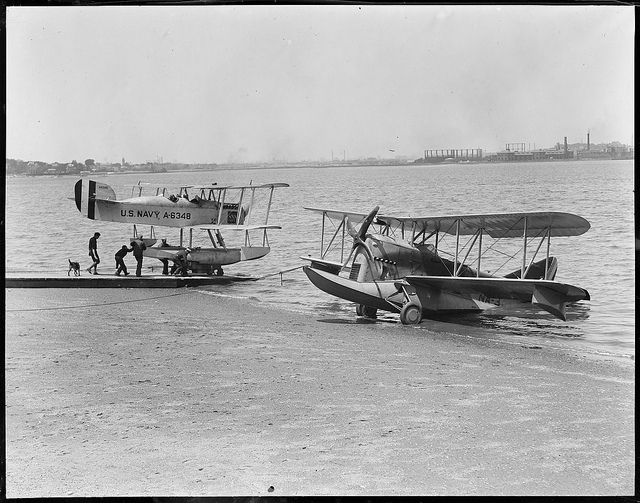

In [8]:
from IPython.display import Image
Image(img['coco_url'])

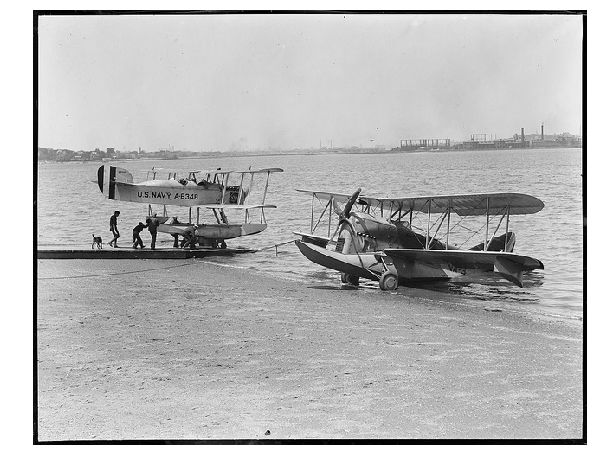

In [9]:
img_file = os.path.join(dataDir,dataType,img['file_name'])

I = io.imread(img_file)
plt.figure()
plt.axis('off')
plt.imshow(I)
plt.show()

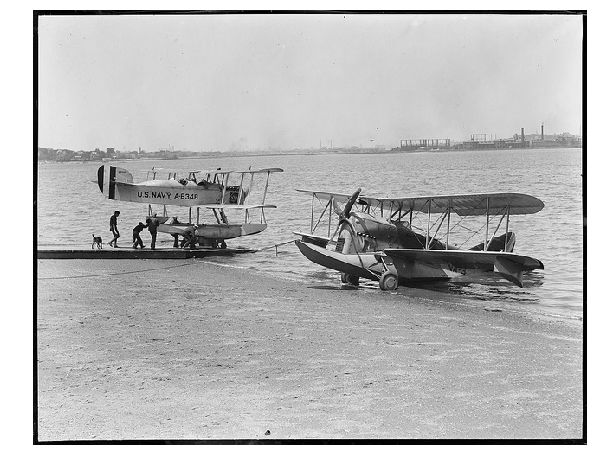

In [10]:
I = io.imread(img['coco_url'])
plt.figure()
plt.axis('off')
plt.imshow(I)
plt.show()

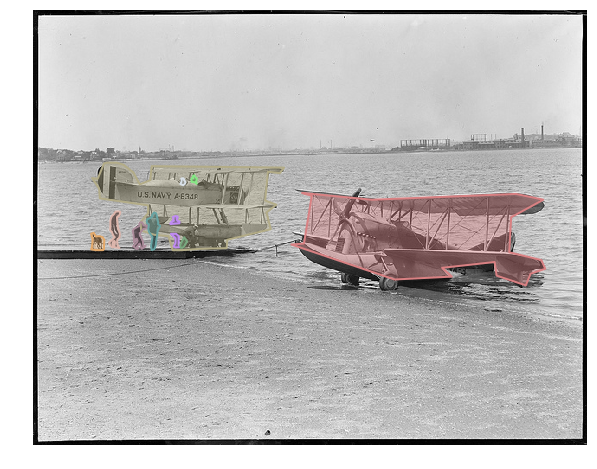

In [11]:
plt.imshow(I)
plt.axis('off')
# Get ann ids that satisfy given filter conditions.
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [12]:
dataDir = COCO_DATA_PATH
dataType = 'train2014'
annFilename = 'person_keypoints_%s.json'%(dataType)
annFile = os.path.join(dataDir,"annotations",annFilename)

In [13]:
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=9.53s)
creating index...
index created!


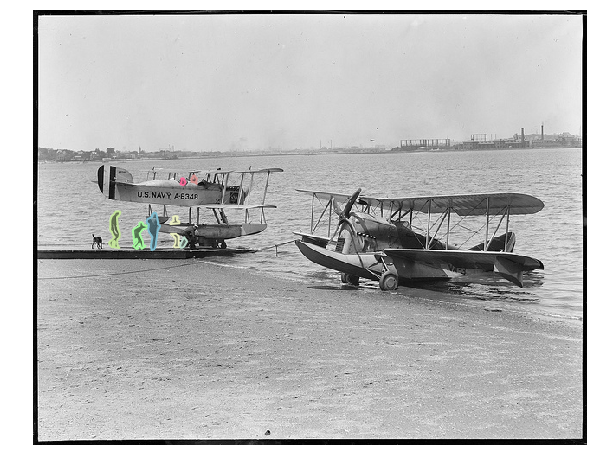

In [17]:
plt.imshow(I)
plt.axis('off')
#ax = plt.gca()

annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [18]:
dataDir = COCO_DATA_PATH
dataType = 'train2014'
annFilename = 'captions_%s.json'%(dataType)
annFile = os.path.join(dataDir,"annotations",annFilename)

In [19]:
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.46s)
creating index...
index created!


Two water capable propeller driven biplanes near the water .
A pair of water planes resting on a lake beach.
Two planes have washed up on the beach's shore.
Two planes sit on the edge of the water. 
A biplane on the beach, parked on the shoreline of the beach, with water coming up on it and another plane next to it.


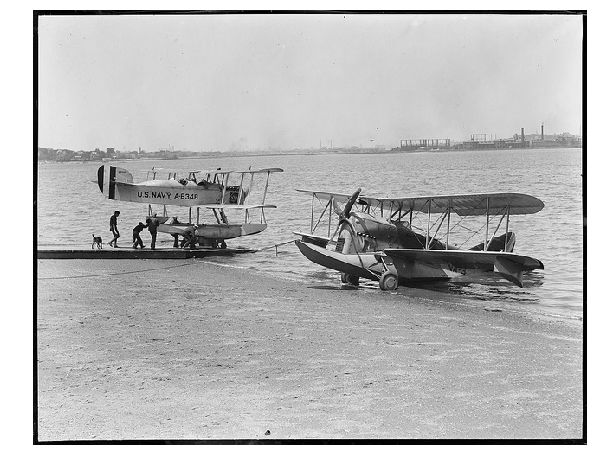

In [20]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);

anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()